# Forest_data

In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importing data
forest=pd.read_csv('D:\ExcelR\Assignments\Downloaded\SVM\\forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest.dropna()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
forest[forest.duplicated()].shape

(8, 31)

In [7]:
forest.drop_duplicates().shape

(509, 31)

In [8]:
fr=pd.DataFrame(forest)

In [9]:
FR=fr.iloc[:,6:11]

In [10]:
FR.head()

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.0
1,18.0,33,0.9,0.0,0.0
2,14.6,33,1.3,0.0,0.0
3,8.3,97,4.0,0.2,0.0
4,11.4,99,1.8,0.0,0.0


In [11]:
FR.tail()

,temp,RH,wind,rain,area
512,27.8,32,2.7,0.0,6.44
513,21.9,71,5.8,0.0,54.29
514,21.2,70,6.7,0.0,11.16
515,25.6,42,4.0,0.0,0.00
516,11.8,31,4.5,0.0,0.00


In [12]:
row_indexes=FR[FR['area']>=5].index

FR.loc[row_indexes,'Area']="large"

row_indexes=FR[FR['area']<5].index

FR.loc[row_indexes,'Area']="small"

FR.head()

,temp,RH,wind,rain,area,Area
0,8.2,51,6.7,0.0,0.0,small
1,18.0,33,0.9,0.0,0.0,small
2,14.6,33,1.3,0.0,0.0,small
3,8.3,97,4.0,0.2,0.0,small
4,11.4,99,1.8,0.0,0.0,small


In [13]:
FR=FR.drop('area', axis=1)

In [14]:
FR.head()

,temp,RH,wind,rain,Area
0,8.2,51,6.7,0.0,small
1,18.0,33,0.9,0.0,small
2,14.6,33,1.3,0.0,small
3,8.3,97,4.0,0.2,small
4,11.4,99,1.8,0.0,small


In [15]:
#correlation matrix
FR.corr()

,temp,RH,wind,rain
temp,1.000000,-0.527390,-0.227116,0.069491
RH,-0.527390,1.000000,0.069410,0.099751
wind,-0.227116,0.069410,1.000000,0.061119
rain,0.069491,0.099751,0.061119,1.000000


# EXPLORATION OF DATA USING VISUALIZATION

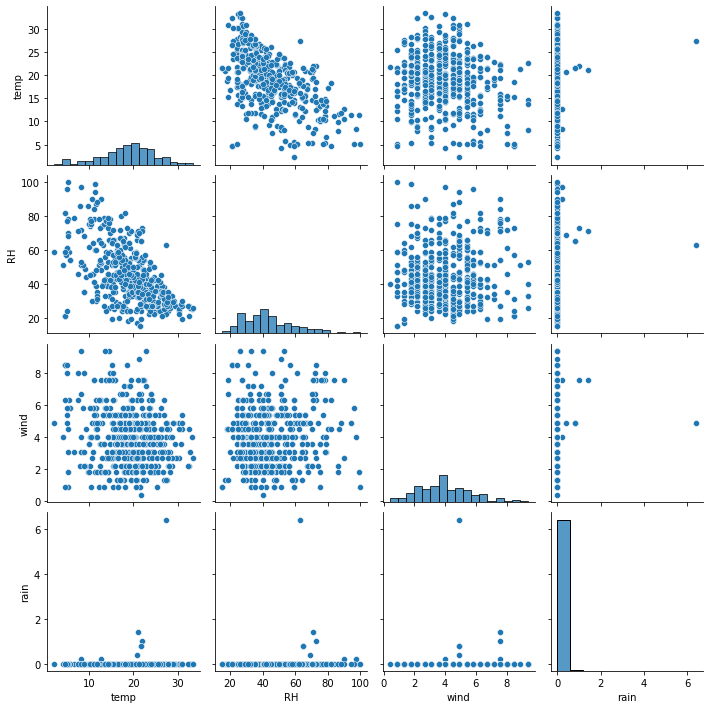

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(FR) #pairplots

<AxesSubplot:>

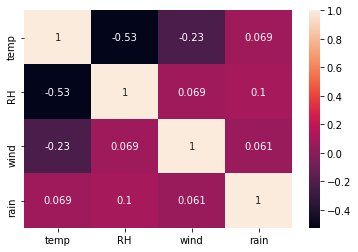

In [17]:
sns.heatmap(FR.corr(), annot=True) #heatmap for FR correlation matrix

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RH', ylabel='Density'>

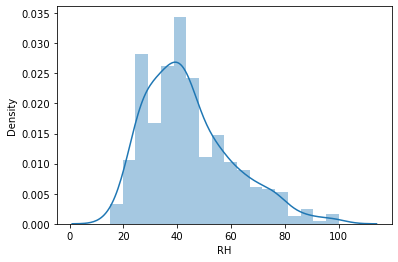

In [18]:
sns.distplot(FR['RH'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind', ylabel='Density'>

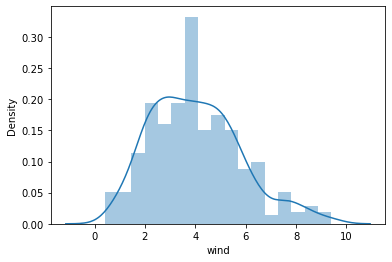

In [19]:
sns.distplot(FR['wind'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

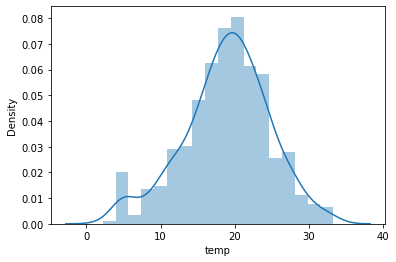

In [20]:
sns.distplot(FR['temp'])

# Spliting data into test and train

In [21]:
from sklearn.model_selection import train_test_split
import sklearn.svm as svm

In [22]:
X= FR.iloc[:,0:4]
y= FR.iloc[:,4]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [23]:
X_train

,temp,RH,wind,rain
281,5.1,24,8.5,0.0
480,30.2,25,4.5,0.0
307,23.8,35,3.6,0.0
142,21.2,51,8.9,0.0
13,21.3,42,2.2,0.0
...,...,...,...,...
350,10.1,75,3.6,0.0
125,20.6,24,5.4,0.0
143,16.6,53,5.4,0.0
12,17.0,72,6.7,0.0


In [24]:
X_test

,temp,RH,wind,rain
425,20.4,56,2.2,0.0
401,22.8,46,4.0,0.0
410,14.7,42,2.7,0.0
495,23.9,42,2.2,0.0
255,22.3,46,4.0,0.0
...,...,...,...,...
69,17.2,26,4.5,0.0
219,15.2,27,3.1,0.0
231,27.8,27,3.1,0.0
482,23.4,40,5.8,0.0


In [25]:
y_train

281    large
480    small
307    large
142    small
13     small
       ...  
350    small
125    small
143    small
12     small
381    large
Name: Area, Length: 361, dtype: object

In [26]:
y_test

425    small
401    small
410    small
495    small
255    small
       ...  
69     small
219    large
231    large
482    small
391    large
Name: Area, Length: 156, dtype: object

# Grid search CV

In [27]:
from sklearn.svm import SVC

In [28]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)

np.mean(pred_test_rbf==y_test)

0.6987179487179487

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred_test_rbf ))

[[  0  47]
 [  0 109]]


In [30]:
print(classification_report(y_test,pred_test_rbf))

              precision    recall  f1-score   support

       large       0.00      0.00      0.00        47
       small       0.70      1.00      0.82       109

    accuracy                           0.70       156
   macro avg       0.35      0.50      0.41       156
weighted avg       0.49      0.70      0.57       156



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## -As we can see there is 69% accuracy for kernal rbf

In [31]:
#Now let us see for other kernal as well


In [32]:
# kernel = linear
model_rbf = SVC(kernel = "linear")
model_rbf.fit(X_train,y_train)
pred_test_linear = model_rbf.predict(X_test)

np.mean(pred_test_linear==y_test)

0.6987179487179487

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred_test_linear ))

[[  0  47]
 [  0 109]]


In [34]:
print(classification_report(y_test,pred_test_linear))

              precision    recall  f1-score   support

       large       0.00      0.00      0.00        47
       small       0.70      1.00      0.82       109

    accuracy                           0.70       156
   macro avg       0.35      0.50      0.41       156
weighted avg       0.49      0.70      0.57       156



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Here the accuracy for kernal linear is 69% which is similar to kernal=rbf